In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from scipy.stats import norm, laplace, expon, pareto, vonmises

from python_files.maxent import MaxEnt
import python_files.densities as d

1. Normal

In [2]:
mu = 0 # mean
s2 = 4 # variance


l = -10
u = 10
n = 40

The resulting parameters:
  Lambda_1 = -0.125


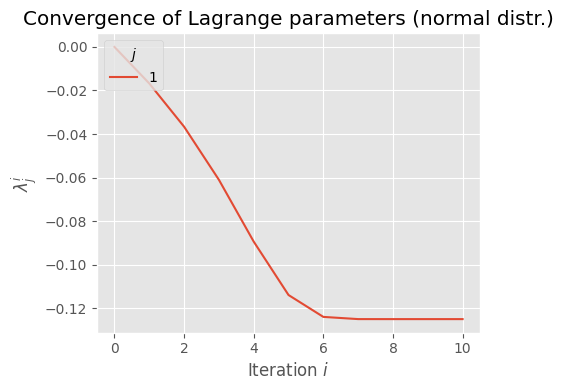

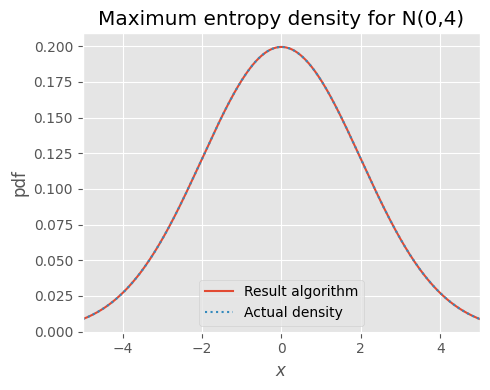

The (Euclidian) distance between result and actual parameter:
1.859e-06


In [3]:
ob = MaxEnt(support=(l,u),
            n_quadrature=n,
            b_constraints=d.b_constraint_normal1(mu,s2),
            f_vector=d.f_constraint_normal1,
            f_param=[mu, s2])
ob.visualize_algorithm(title="Convergence of Lagrange parameters (normal distr.)")

ob.visualize_solution(xlim=(-5+mu,mu+5),
                       title = f"Maximum entropy density for N({mu},{s2})", 
                       actual_density=d.pdf_norm, 
                       actual_param=(mu,s2),
                       actual_lambda=d.lambda_actual_normal1(mu,s2))

The resulting parameters:
  Lambda_1 = 0.000
  Lambda_2 = -0.125


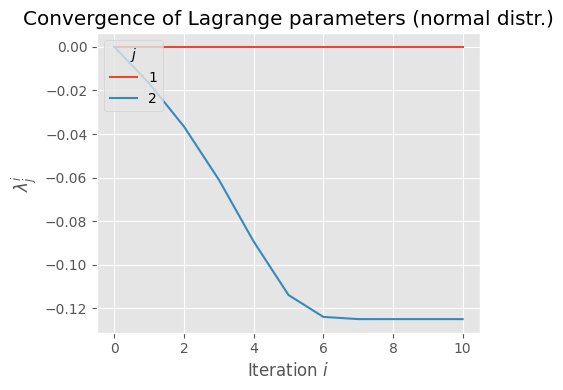

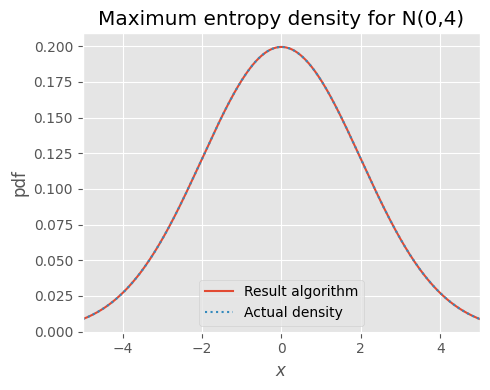

The (Euclidian) distance between result and actual parameter:
1.859e-06


In [4]:
#second option: using two constraints 
ob = MaxEnt(support=(l,u),
            n_quadrature=n,
            b_constraints=d.b_constraint_normal2(mu,s2),
            f_vector=d.f_constraint_normal2,
            f_param=[mu,s2])
ob.visualize_algorithm(title="Convergence of Lagrange parameters (normal distr.)")
ob.visualize_solution(xlim=(-5+mu,mu+5), 
                       title = f"Maximum entropy density for N({mu},{s2})", 
                       actual_density=d.pdf_norm, 
                       actual_param=(mu,s2),
                       actual_lambda=d.lambda_actual_normal2(mu,s2))

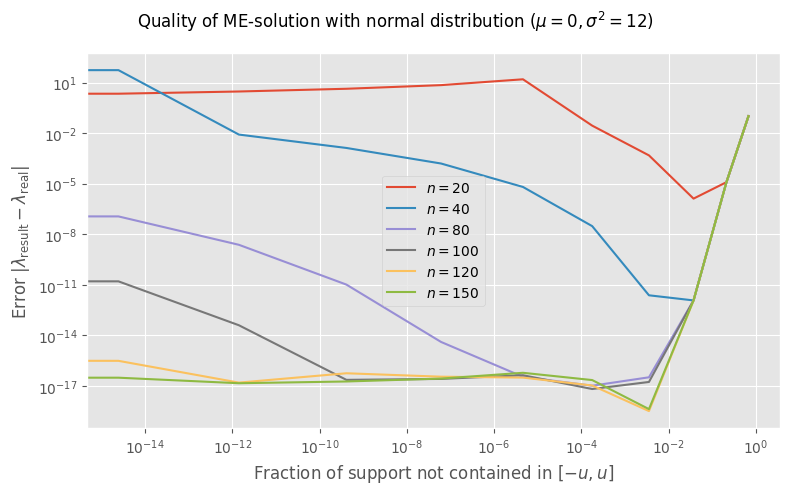

In [5]:
# test of different supports and different quadrature sizes
mu = 0
s2 = 12

b2 = d.b_constraint_normal2(mu,s2)

a = np.arange(5,150,10) # support [-a,a]

ns = [20,40,80,100,120,150]

l_arr = np.zeros(len(a))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(2*norm.cdf(a, loc=mu, scale=s2)-1)

for i, n in enumerate(ns):
    for j, u in enumerate(a):
        l = -u
        ob_laplace = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=d.b_constraint_normal2(mu,s2),
                            f_vector=d.f_constraint_normal2,
                            f_param=[mu,s2],
                            warning_convergence=False,
                            message_norm=False)
        l_arr[j] = ob_laplace.calc_error(d.lambda_actual_normal2(mu,s2))
    ax.plot(xx, l_arr, label=f"$n={n}$")


ax.legend()
ax.set_xlabel("Fraction of support not contained in $[-u,u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with normal distribution ($\\mu={mu},\\sigma^2={s2}$)")
plt.tight_layout()
plt.show()

2. Laplace

In [6]:
mu = 0
c = 1


l,u = -30,30
n = 60

The resulting parameters:
  Lambda_1 = -1.339


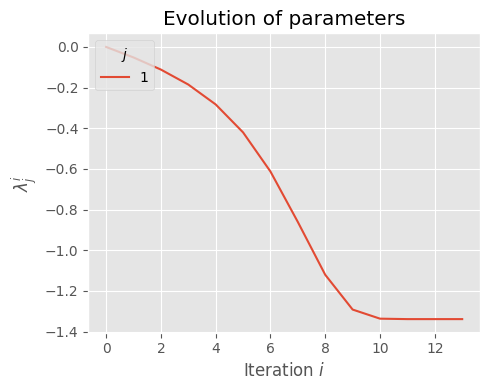

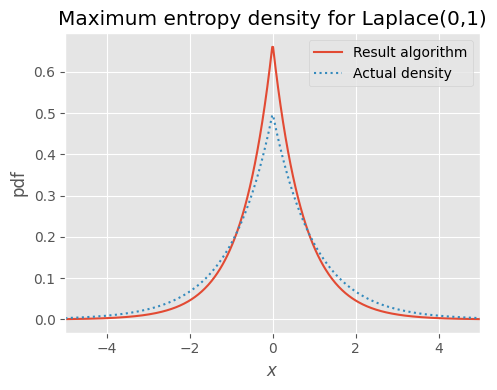

The (Euclidian) distance between result and actual parameter:
3.386e-01


In [7]:
ob_laplace = MaxEnt(support=(l,u),
                    n_quadrature=n,
                    b_constraints=d.b_constraint_laplace(mu,c),
                    f_vector=d.f_constraint_laplace,
                    f_param=[mu,c])
ob_laplace.visualize_algorithm()
ob_laplace.visualize_solution(xlim=(mu-5,mu+5),  
                               title = f"Maximum entropy density for Laplace({mu},{c})", 
                               actual_density=d.pdf_laplace,
                               actual_param=(mu,c),
                               actual_lambda=d.lambda_actual_laplace(mu,c))

/home/liselotp/BRP/max_entropy/python_files/maxent.py:364: RuntimeWarning: overflow encountered in exp
  c, s = quad(lambda x: np.exp(np.inner(self._la,


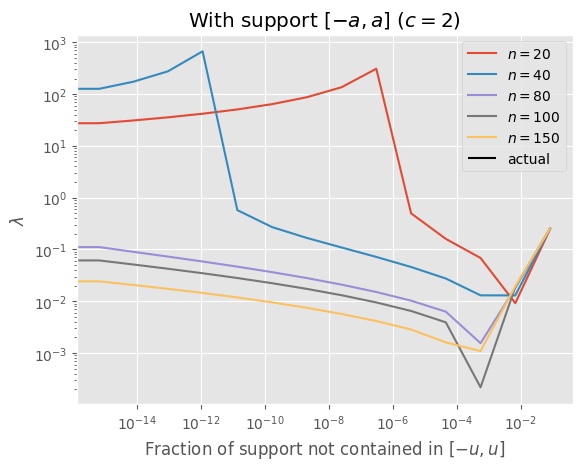

In [8]:
# test of different support

a = np.arange(5,100,5)
mu = 0
c = 2

b = d.b_constraint_laplace(mu,c)
ns = [20,40,80,100,150]

l_arr = np.zeros(len(a))

fig = plt.figure(dpi=100)

ax = plt.subplot()
xx = 1-(2*laplace.cdf(a, loc=mu, scale=c)-1)
for j, n in enumerate(ns):
    for i, u in enumerate(a):
        l = -u
        ob_laplace = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b,
                            f_vector=d.f_constraint_laplace,
                            f_param=[mu,c], 
                            warning_convergence=False,
                            message_norm=False)
        l_arr[i] = ob_laplace.calc_error(d.lambda_actual_laplace(mu,c))
    ax.plot(xx, l_arr, label=f"$n={n}$")

ax.hlines(d.lambda_actual_laplace(mu,c), min(xx),max(xx),label="actual",
          color="black")
ax.legend()
ax.set_xlabel("Fraction of support not contained in $[-u,u]$")
ax.set_ylabel("$\\lambda$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f"With support $[-a,a]$ ($c={c}$)")
plt.show()

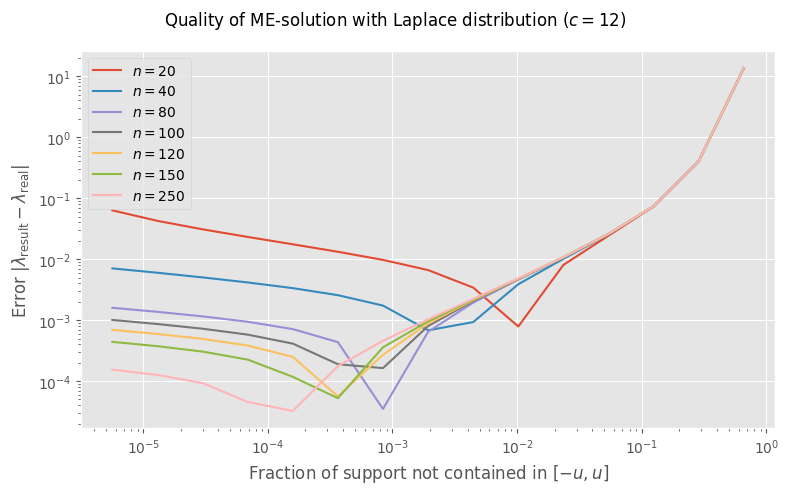

In [9]:
# test of different supports and different quadrature sizes
mu = 0
c = 12
b = d.b_constraint_laplace(mu,c)

a = np.arange(5,150,10) # support [-a,a]

ns = [20,40,80,100,120,150,250]

l_arr = np.zeros(len(a))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(2*laplace.cdf(a, loc=mu, scale=s2)-1)
for i, n in enumerate(ns):
    for j, u in enumerate(a):
        l = -u
        ob_laplace = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=b,
                            f_vector=d.f_constraint_laplace,
                            f_param=[mu,c],
                            warning_convergence=False,
                            message_norm=False)
        l_arr[j] = ob_laplace.calc_error(d.lambda_actual_laplace(mu,c))
    ax.plot(xx, l_arr, label=f"$n={n}$")

ax.legend()
ax.set_xlabel("Fraction of support not contained in $[-u,u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with Laplace distribution ($c={c}$)")
plt.tight_layout()
plt.show()

3.Exponential

The resulting parameters:
  Lambda_1 = -2.000


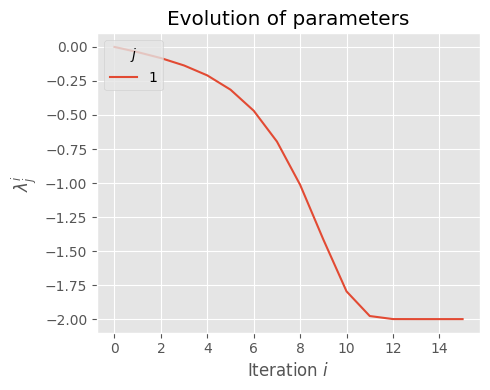

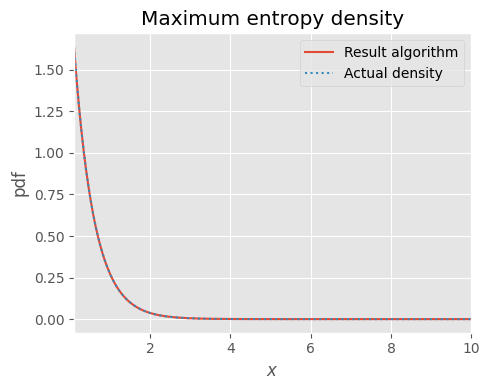

The (Euclidian) distance between result and actual parameter:
2.183e-13


In [10]:
a=2 #>0

l,u = 0,40
n = 80

ob_rayleigh = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_expon(a),
                     f_vector=d.f_constraint_expon,
                     f_param=[a])
ob_rayleigh.visualize_algorithm()
ob_rayleigh.visualize_solution(xlim=(0.1,10),
                                actual_density=d.pdf_expon, 
                                actual_param=[a],
                                actual_lambda=d.lambda_actual_expon(a))

/home/liselotp/BRP/max_entropy/python_files/maxent.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  c, s = quad(lambda x: np.exp(np.inner(self._la,


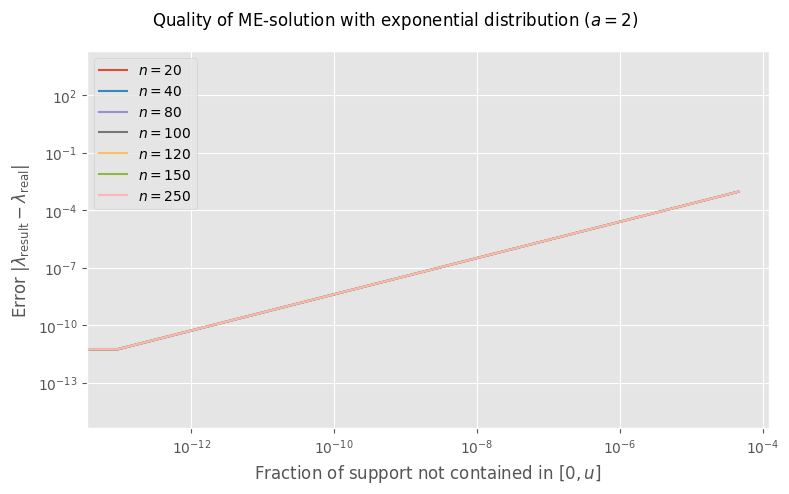

In [11]:
# test of different supports and different quadrature sizes
a = 2
l = 0

us = np.arange(5,200,10) # support [0,a]

ns = [20,40,80,100,120,150,250]

l_arr = np.zeros(len(us))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(expon.cdf(us, loc=0, scale=1/a))

for i, n in enumerate(ns):
    for j, u in enumerate(us):
        ob_expon = MaxEnt(support=(l,u),
                        n_quadrature=n,
                        b_constraints=d.b_constraint_expon(a),
                        f_vector=d.f_constraint_expon,
                        f_param=[a],
                        warning_convergence=False,
                        message_norm=False)
        l_arr[j] = ob_expon.calc_error(d.lambda_actual_expon(a))
    ax.plot(xx, l_arr, label=f"$n={n}$")


ax.set_xlabel("Fraction of support not contained in $[0,u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.suptitle(f"Quality of ME-solution with exponential distribution ($a={a}$)")
plt.tight_layout()
plt.show()

4. Pareto

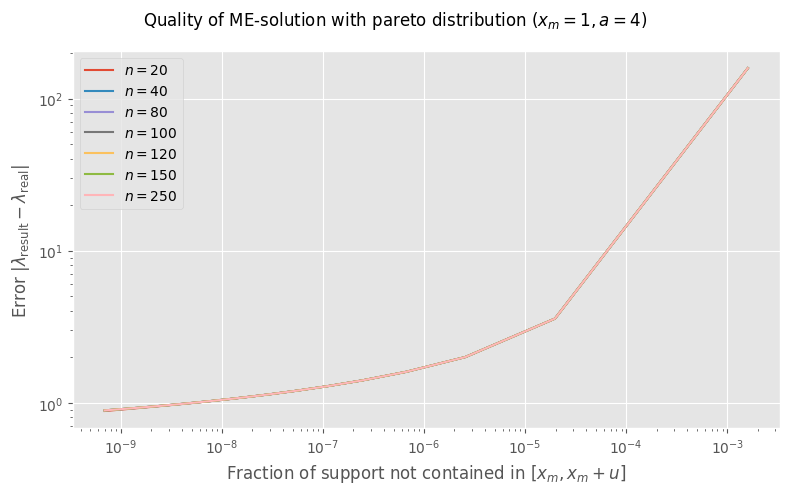

In [12]:
# test of different supports and different quadrature sizes
a = 4
xm = 1
l = xm

us = xm+np.arange(5,200,10) # support [xm,xm+a]

ns = [20,40,80,100,120,150,250]

l_arr = np.zeros(len(us))

fig, ax = plt.subplots(1,1,figsize=(8,5))

xx = 1-(pareto.cdf(us, a,loc=xm))

for i, n in enumerate(ns):
    for j, u in enumerate(us):
        ob_pareto = MaxEnt(support=(l,u),
                            n_quadrature=n,
                            b_constraints=d.b_constraint_pareto(xm,a),
                            f_vector=d.f_constraint_pareto,
                            f_param=[xm,a],
                            warning_convergence=False,
                            message_norm=False)
        l_arr[j] = ob_pareto.calc_error(d.lambda_actual_pareto(xm,a))
    ax.plot(xx, l_arr, label=f"$n={n}$")


ax.legend()
ax.set_xlabel("Fraction of support not contained in $[x_m,x_m+u]$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
ax.set_xscale('log')
fig.suptitle(f"Quality of ME-solution with pareto distribution ($x_m={xm},a={a}$)")
plt.tight_layout()
plt.show()

In [13]:
#a=0.33 causes trouble
a = .34

xm = 2 #>0

l,u = 2.01,40
n = 100

The resulting parameters:
  Lambda_1 = -70.743


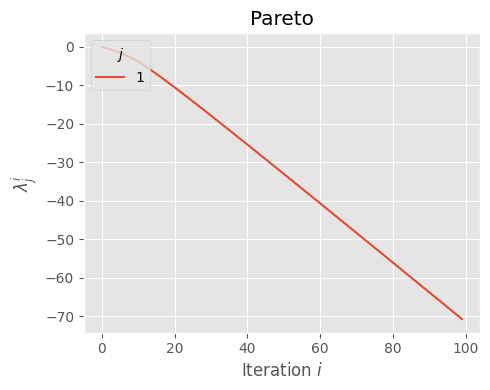

In [14]:

ob_pareto = MaxEnt(support=(l,u),
                   n_quadrature=n, 
                   b_constraints=d.b_constraint_pareto(xm,a), 
                   f_vector=d.f_constraint_pareto,
                   f_param=[xm,a],
                   warning_convergence=False,
                   message_norm=False)
ob_pareto.visualize_algorithm(title="Pareto")


In [15]:
ls = [2.01,2.1,2.7]
us = np.linspace(20,100,7)
n = 100
results = np.zeros(len(us))

for i in range(len(us)):
    b = d.b_constraint_pareto(xm,a)
    ob_pareto = MaxEnt(support=(ls[0], us[i]), 
                       n_quadrature=n, 
                       b_constraints=b, 
                       f_vector=d.f_constraint_pareto,
                       f_param=[xm,a],
                       warning_convergence=False,
                       message_norm=False)
    results[i] = ob_pareto.get_la()[0]

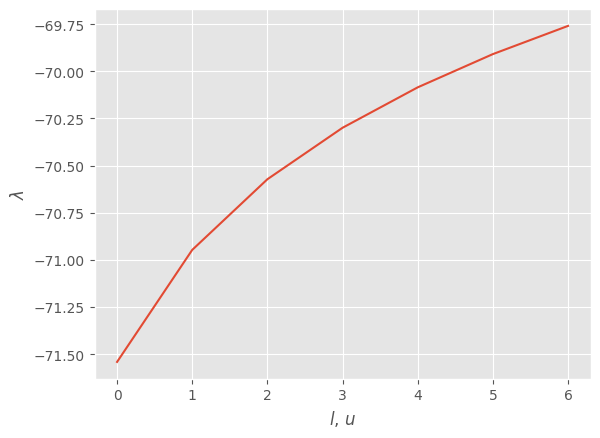

In [16]:
fig,ax=plt.subplots(dpi=100)
ax.plot(results)
ax.set_xlabel("$l$, $u$")
ax.set_ylabel("$\\lambda$")
plt.show()

The resulting parameters:
  Lambda_1 = -67.182


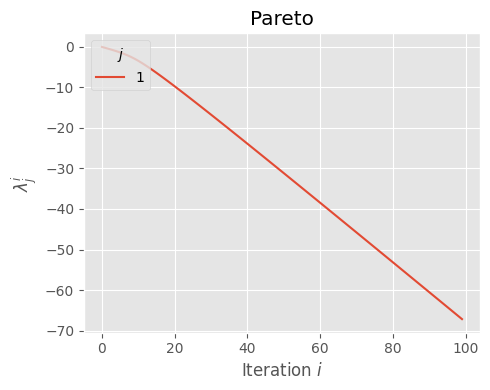

In [17]:
a = 0.32
xm = 2 #>0

l,u = 2.01,60
n = 200

b = d.b_constraint_pareto(xm,a)

ob_pareto = MaxEnt(support=(l, u),
                   n_quadrature=n, 
                   b_constraints=b, 
                   f_vector=d.f_constraint_pareto,
                   f_param=[xm,a],
                   warning_convergence=False,
                   message_norm=False)
ob_pareto.visualize_algorithm(title="Pareto")

In [18]:
def convergence_plot(X, Y, Z, xlab="Parameter 1", ylab="Parameter 2"):
    # data = convergence_indicator_mat
    fig, ax = plt.subplots() 
    
    ax.set_title("Convergence indicator") 
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

    cset1 = ax.contourf(X,Y,Z,levels=1)

    fig.colorbar(cset1, ax=ax)
    # plt.savefig('pixel_plot.pdf') 
    plt.show() 

In [19]:
N_a = 20
N_u = 40

arr_a = np.linspace(0.1, 2, N_a)
arr_u = np.linspace(5, 500, N_u)
As, Us = np.meshgrid(arr_a,arr_u)

convergence_indicator_mat = np.zeros((N_a,N_u))

xm = 2 #>0
n = 100

l = 2.1

for i in range(N_a):
    a = arr_a[i]
    b = d.b_constraint_pareto(xm,a)
    for j in range(N_u):
        u = arr_u[j]
        ob_pareto = MaxEnt(support=(l,u),
                           n_quadrature=n, 
                           b_constraints=b, 
                           f_vector=d.f_constraint_pareto,
                           f_param=[xm,a],
                           warning_convergence=False,
                           message_norm=False)
        if(ob_pareto.get_converges()):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0

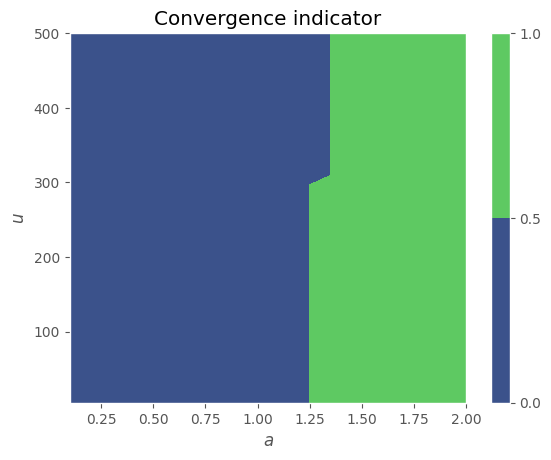

In [20]:
convergence_plot(As,Us,convergence_indicator_mat.T, xlab="$a$", ylab='$u$')

5. Rayleigh

In [21]:
s2 = 1

l,u = 0,40
n = 100

/home/liselotp/BRP/ME/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


The resulting parameters:
  Lambda_1 = -0.500
  Lambda_2 = 1.000


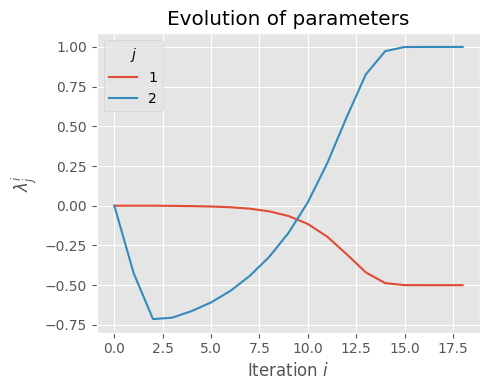

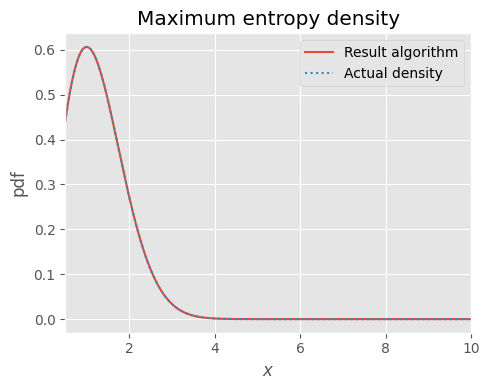

The (Euclidian) distance between result and actual parameter:
2.518e-05


In [22]:

ob_rayleigh = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_rayleigh(s2),
                     f_vector=d.f_constraint_rayleigh,
                     f_param=[s2])
ob_rayleigh.visualize_algorithm()
ob_rayleigh.visualize_solution(xlim=(0.5,10),
                            actual_density=d.pdf_rayleigh,
                            actual_param=[s2],
                            actual_lambda=d.lambda_actual_rayleigh(s2))

6. Maxwell-Boltzmann

In [23]:
b=1

def f_MaxBoltz(x):
    return np.array([x**2, anp.log(x)])
b = np.array([3 * b**2, 1+ np.log(b/np.sqrt(2)) - np.euler_gamma/2])

l,u = 0, 40
n = 40

The resulting parameters:
  Lambda_1 = -0.500
  Lambda_2 = 2.000


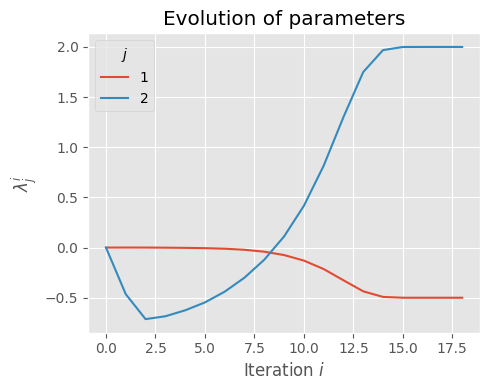

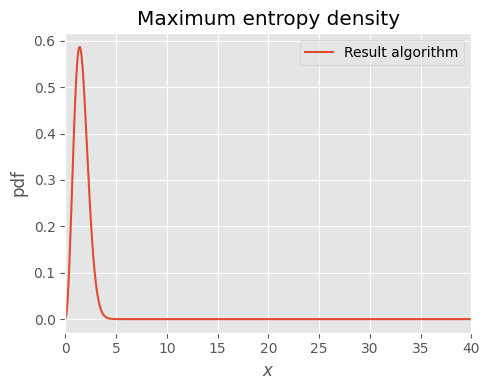

In [24]:
ob_MaxBoltz = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=b,
                     f_vector=f_MaxBoltz)
ob_MaxBoltz.visualize_algorithm()
ob_MaxBoltz.visualize_solution()

5. Von Mises

In [25]:
from scipy.special import iv #modified bessel function of first kind

The resulting parameters:
  Lambda_1 = 2.476
  Lambda_2 = 1.694


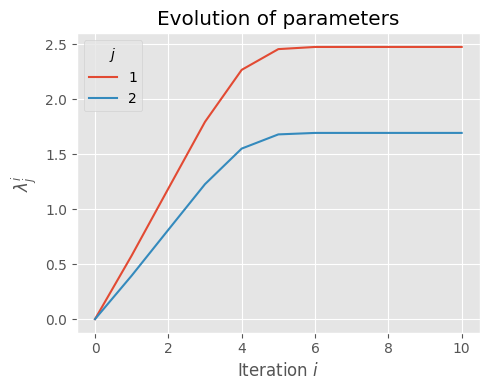

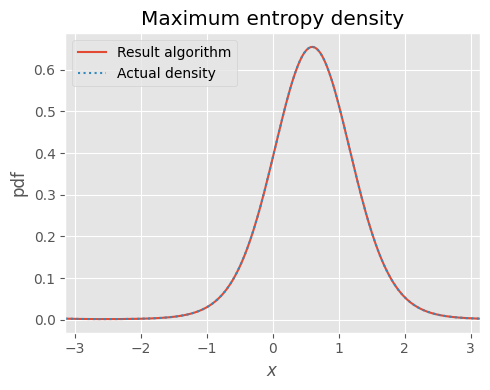

The (Euclidian) distance between result and actual parameter:
3.382e-15


In [26]:
mu = .6
k  = 3
#answers should be k cos(mu)
#and k sin(mu)

b = d.b_constraint_vonmises(mu,k)

l,u = -np.pi, np.pi
n = 250
ob_VonMises = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=b,
                     f_vector=d.f_constraint_vonmises,
                     f_param=[mu,k])
ob_VonMises.visualize_algorithm()
ob_VonMises.visualize_solution(xlim=(-np.pi,np.pi),
                                actual_density=d.pdf_vonmises,
                                actual_param=[mu,k],
                                actual_lambda=d.lambda_actual_vonmises(mu,k))

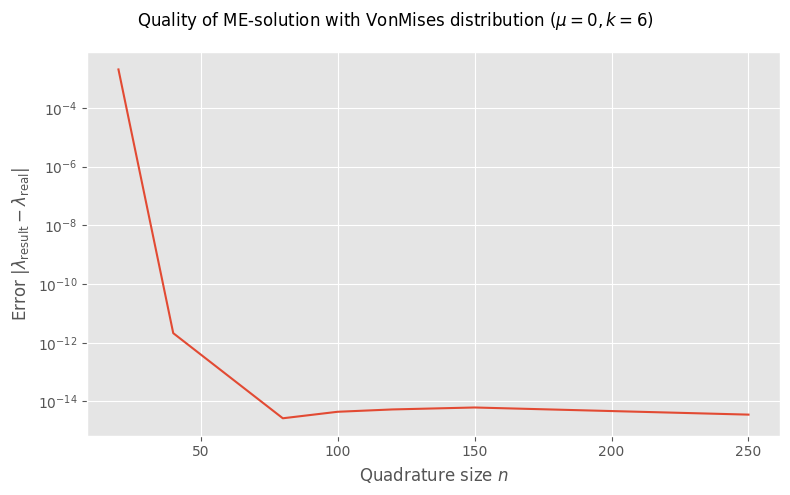

In [27]:
# test of different quadrature sizes
mu = 0
k = 6
l,u = -np.pi, np.pi


ns = [20,40,80,100,120,150,250]
l_arr = np.zeros(len(ns))

fig, ax = plt.subplots(1,1,figsize=(8,5))

for i, n in enumerate(ns):
    ob_vonmises = MaxEnt(support=(l,u),
                        n_quadrature=n,
                        b_constraints=d.b_constraint_vonmises(mu,k),
                        f_vector=d.f_constraint_vonmises,
                        f_param=[mu,k],
                        warning_convergence=False,
                        message_norm=False)
    l_arr[i] = ob_vonmises.calc_error(d.lambda_actual_vonmises(mu,k))


ax.plot(ns,l_arr)
ax.set_xlabel("Quadrature size $n$")
ax.set_ylabel("Error $|\\lambda_{\\text{result}}-\\lambda_{\\text{real}}|$")
ax.set_yscale('log')
fig.suptitle(f"Quality of ME-solution with VonMises distribution ($\\mu={mu},k={k}$)")
plt.tight_layout()
plt.show()

6. Skew-Kurt

In [28]:
#assume mean=0, var=1

l = -10
u = 10
n = 40

The resulting parameters:
  Lambda_1 = -0.000
  Lambda_2 = -0.500
  Lambda_3 = 0.000
  Lambda_4 = 0.000


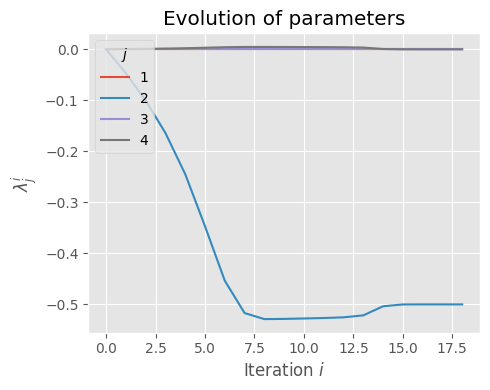

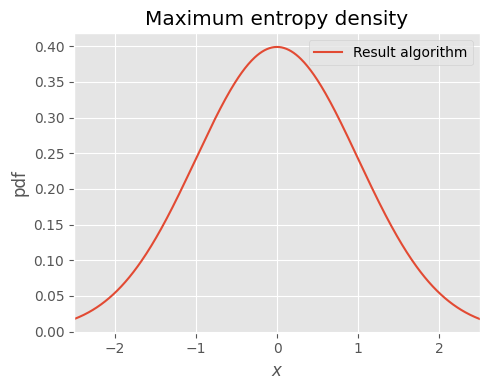

In [29]:
skew, kurt = 0, 3 #normal distribution

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution(xlim=(-2.5,2.5))

The resulting parameters:
  Lambda_1 = -0.744
  Lambda_2 = -0.523
  Lambda_3 = 0.327
  Lambda_4 = -0.059


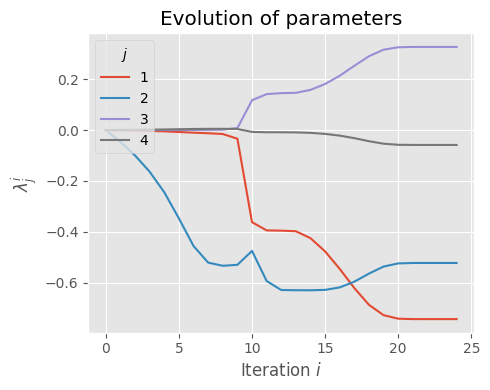

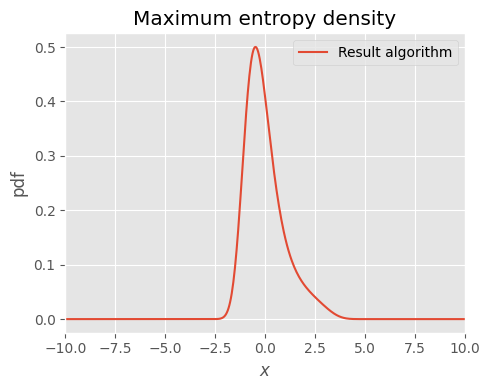

In [30]:
skew, kurt = 1, 4 

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = -1057.228
  Lambda_2 = -21.198
  Lambda_3 = 423.596
  Lambda_4 = -92.869


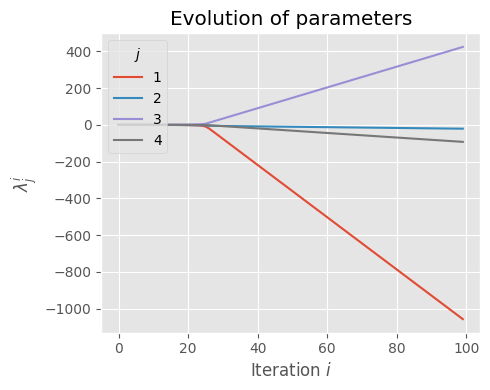

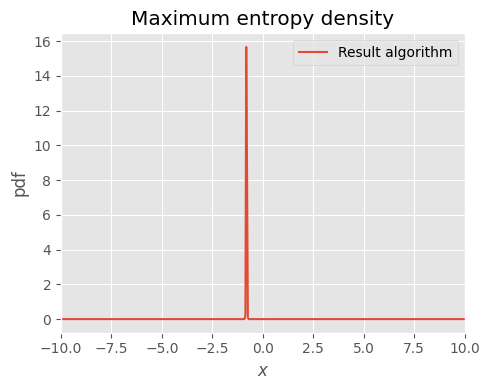

In [31]:
skew, kurt = a, 4 

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()